In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import os

Using TensorFlow backend.
c:\Users\levan\.conda\envs\dacs\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\levan\.conda\envs\dacs\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\levan\.conda\envs\dacs\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\levan\.conda\envs\dacs\lib\site-packages\tensorflo

In [16]:
from keras.preprocessing import image

In [23]:
def load_test_image():
    images_labels = []
    images = glob("dataset/test_set/*/*.png")
    images.sort()
    for i in images:
        label = i[i.find(os.sep)+1: i.rfind(os.sep)]
        img = cv2.imread(i)
        test_image = cv2.resize(img, (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        images_labels.append((test_image, label))
    return images_labels

images_labels  = load_test_image()

In [8]:
from sklearn.utils import shuffle

In [24]:
images_labels = shuffle(shuffle(shuffle(shuffle(images_labels))))
images, labels = zip(*images_labels)
print("Length of images_labels", len(images_labels))

Length of images_labels 6500


In [13]:
model = load_model('model.h5')

In [31]:
pred_probabs = []
for i in images:
    p = model.predict(i)
    pred_probabs.append(p)

In [51]:
pred_labels = []

In [47]:
folder = './dataset/training_set'
sub_folders = [name for name in os.listdir(
    folder) if os.path.isdir(os.path.join(folder, name))]

In [52]:
for pred_probab in pred_probabs:
	i = list(pred_probab[0]).index(max(pred_probab[0]))
	pred_labels.append(sub_folders[i])

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
cm = confusion_matrix(labels, np.array(pred_labels))

In [56]:
classification_report = classification_report(labels, np.array(pred_labels))
print('\n\nClassification Report') 
print('---------------------------')
print(classification_report)



Classification Report
---------------------------
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       250
           B       1.00      1.00      1.00       250
           C       1.00      1.00      1.00       250
           D       1.00      1.00      1.00       250
           E       0.94      1.00      0.97       250
           F       1.00      1.00      1.00       250
           G       0.85      1.00      0.92       250
           H       1.00      0.82      0.90       250
           I       1.00      1.00      1.00       250
           J       1.00      1.00      1.00       250
           K       0.98      1.00      0.99       250
           L       1.00      1.00      1.00       250
           M       0.94      1.00      0.97       250
           N       0.96      0.95      0.95       250
           O       1.00      0.96      0.98       250
           P       1.00      1.00      1.00       250
           Q       1.00      

In [58]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion_matrix.png')

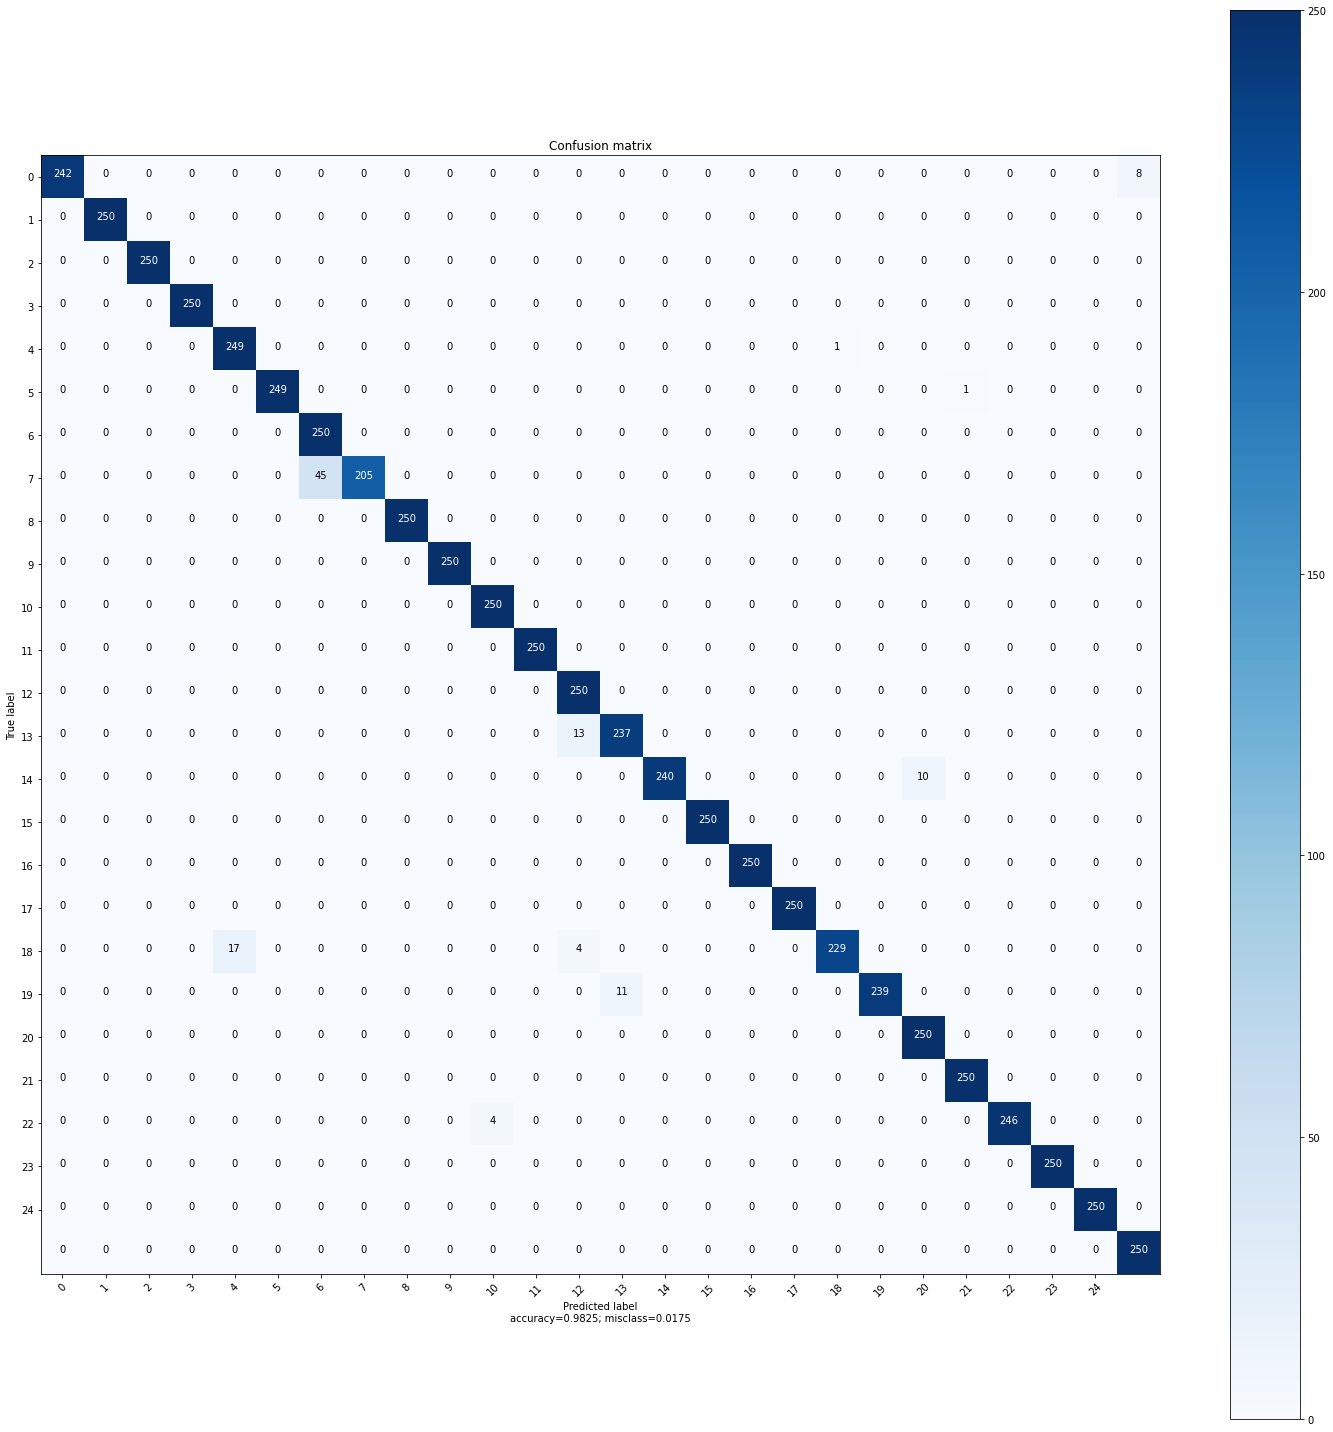

In [61]:
plot_confusion_matrix(cm, range(25), normalize=False)